In [192]:
import numpy as np 
import pandas as pd
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
import scipy as sp 
from scipy.stats import poisson

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')
plt.rcParams['axes.facecolor'] = 'midnightblue'
plt.rcParams['figure.facecolor'] = "#060552"
plt.rcParams['axes.grid'] = 'True'
plt.rcParams['grid.color'] = 'steelblue'
plt.rcParams['grid.linewidth'] = 0.6
plt.rcParams['grid.alpha'] = 0.8
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.linewidth'] = 0.5
plt.rcParams['legend.facecolor'] = "#060552"

This will be the starting notebook file for assignment # 1

In [3]:
gaia_file = '/Users/leayamashiro/AnA_MSc/Period_3_2026/phys_statistics/assignments/data/gaia_data.fits'

In [193]:
dr3stars = fits.open(gaia_file)
dr3stars.info()
print(dr3stars[1].columns)
stars = pd.DataFrame(dr3stars[1].data)
stars['Name'] = stars['Name'].str.strip()

Filename: /Users/leayamashiro/AnA_MSc/Period_3_2026/phys_statistics/assignments/data/gaia_data.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      93   ()      
  1  members.dat    1 TableHDU       331   1291929R x 56C   [A20, I4, I19, I1, F10.8, F12.8, F10.8, F12.8, F10.8, F12.8, E11.4, E11.4, F10.8, E11.4, F10.8, E11.4, F10.8, F11.8, F11.8, E11.4, E11.4, E11.4, E11.4, E11.4, E11.4, I2, F12.8, F10.7, F11.8, F10.8, F19.8, F16.8, F18.8, F17.8, F18.8, F17.8, F10.7, F10.7, F10.7, E11.4, E11.4, E11.4, E9.3, F12.8, F4.1, F6.1, F5.1, F11.7, F11.8, F6.1, F12.7, F13.8, F5.1, A13, I1, I1]   
ColDefs(
    name = 'Name'; format = 'A20'; start = 1
    name = 'ID'; format = 'I4'; disp = 'I4'; start = 22
    name = 'GaiaDR3'; format = 'I19'; disp = 'I19'; start = 27
    name = 'inrt'; format = 'I1'; disp = 'I1'; start = 47
    name = 'Prob'; format = 'F10.8'; disp = 'F10.8'; start = 49
    name = 'RAdeg'; format = 'F12.8'; unit = 'deg'; disp = 'F12

In [194]:
stars
# okay so each row is a star, 

,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
0,1636-283,0,6032349260227596544,0,0.747692,249.708525,0.201080,-28.585117,0.115789,351.679705,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1,1636-283,0,6032358331198284160,1,1.000000,249.866424,0.020684,-28.402037,0.013691,351.914287,...,8.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
2,1636-283,0,6032358331198285696,1,0.843798,249.865221,0.046356,-28.399406,0.029595,351.915643,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
3,1636-283,0,6032358331198286080,1,1.000000,249.861159,0.045101,-28.400698,0.030237,351.912273,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
4,1636-283,0,6032358670488486784,1,1.000000,249.939480,0.038724,-28.429366,0.023344,351.935370,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1291924,vdBergh_92,7163,3045840104515988992,1,1.000000,106.116546,0.110176,-11.474387,0.111851,224.621323,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291925,vdBergh_92,7163,3045840074455065088,1,0.838193,106.136236,0.049847,-11.471452,0.049169,224.627544,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0
1291926,vdBergh_92,7163,3045840074453671680,1,0.639341,106.135606,0.056229,-11.468653,0.058581,224.624770,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,VARIABLE,0,0
1291927,vdBergh_92,7163,3045840654267074048,1,0.738133,106.159649,0.058318,-11.436082,0.062037,224.606570,...,0.0,0.00000,0.000000,0.0,0.00000,0.000000,0.0,NOT_AVAILABLE,0,0


In [195]:
clcounts = stars.groupby(['Name']).size().reset_index(name='count')
clcounts

,Name,count
0,1636-283,38
1,ADS_16795,41
2,AH03_J0748+26.9,68
3,ASCC_100,87
4,ASCC_101,224
...,...,...
7162,vdBergh_152,25
7163,vdBergh_80,93
7164,vdBergh_83,92
7165,vdBergh_85,105


In [196]:
data_explain = pd.read_fwf(
    "data_description.txt",
    colspecs=[ # overkill but just so I can look at it as a table
        (0, 8),    # Bytes
        (9, 15),   # Format
        (16, 22),   # Units
        (23, 36),   # Label
        (37, 82)  # Explanations 
        ], 
        names=["Bytes", "Format", "Units", "Label", "Explanations"]
)
data_explain = data_explain.dropna(subset=["Bytes"])
data_explain = data_explain[data_explain["Bytes"].str.contains(r"\d", na=False)]
data_explain = data_explain.reset_index(drop=True)
data_explain

,Bytes,Format,Units,Label,Explanations
0,1- 15,F15.11,deg,RAdeg,[] Gaia DR2 right ascension (ICRS)
1,17- 31,F15.11,deg,DEdeg,Gaia DR2 declination (ICRS)
2,33- 51,I19,---,Source,Gaia DR2 source_id (source_id)
3,53- 66,F14.10,deg,GLON,[] Gaia DR2 Galactic longitude (l)
4,68- 81,F14.10,deg,GLAT,Gaia DR2 Galactic latitude (b)
5,83- 92,F10.4,mas,plx,Gaia DR2 parallax (parallax)
6,94- 99,F6.4,mas,e_plx,Gaia DR2 parallax error (parallax_error)
7,101-109,F9.3,mas/yr,pmRA,Gaia DR2 proper motion along RA (pmra)
8,111-115,F5.3,mas/yr,e_pmRA,Gaia DR2 pmRA error (pmra_error)
9,117-125,F9.3,mas/yr,pmDE,Gaia DR2 proper motion along DE (pmdec)


Writing these questions before I start! 

- difference between `Gaia DR2 correlation factor (ra_dec_corr)` and `Gaia DR2 correlation factor`? (Row 11-12)
- what kind of correlation factors? are they the Fourier kind (for interferometry)? What are these for? and how are they calculated?? 
- what is `inrt`?
- are any stars candidates for multiple clusters? (to answer this: how far apart in degree are the clusters (of known cluster stars)) 
- are all stars in this type of catalogues *all* technically "candidates"? or no. 

### 1. Exploratory Data Analysis (6 pts): The parameter `Prob` gives a conservative estimate of the probability that the star is associated with the cluster, by doing a "clustering" analysis of the stars in the 5-dimensional astrometric parameter space, i.e. using `RAdeg`, `DEdeg`, `Plx`, `pmRA` and `pmDE`.

 **a. Use the Pandas sample function on your cluster star counts dataframe, to randomly select 4 clusters, only from clusters with >1000 candidate stars. Please make sure to include the random seed you used in the notebook for reproducibility. Be sure to include the names of the clusters in your notebook!**

In [197]:
# organizing cluster for sampling
clcount_gt1000 = clcounts[clcounts['count']>1000] 
clcount_gt1000.sort_values('count', ascending = False)

,Name,count
5921,Theia_6046,153797
4638,NGC_5139,65987
4731,NGC_6397,27910
4600,NGC_3201,25448
4678,NGC_6121,22191
...,...,...
3773,HSC_561,1067
4331,King_11,1056
4553,NGC_2447,1043
4701,NGC_6253,1022


Okay. Think I need to use `np.random.choice`? 

In [198]:
# doing number selection here, immediately to report in cell below
random_4cl = np.random.choice(clcount_gt1000['Name'], size=4)
print(random_4cl)

['NGC_6218' 'NGC_1904' 'Berkeley_53' 'NGC_4833']


**My random selection is: ['NGC_6402' 'NGC_1039' 'NGC_362' 'Trumpler_20']**

In [199]:
cl_4sample = clcount_gt1000[clcount_gt1000['Name'].isin(['NGC_6402', 'NGC_1039', 'NGC_362', 'Trumpler_20'])]
print('Cluster Count Sample:')
cl_4sample

Cluster Count Sample:


,Name,count
4438,NGC_1039,1095
4611,NGC_362,8941
4734,NGC_6402,1337
6054,Trumpler_20,1692


In [200]:
stars_cl4sample = stars[stars['Name'].isin(['NGC_6402', 'NGC_1039', 'NGC_362', 'Trumpler_20'])]
print('Stars, Cluster-Sampled:')
stars_cl4sample

Stars, Cluster-Sampled:


,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
358296,NGC_1039,4465,337182734061484800,1,0.683711,40.882332,0.210117,42.985478,0.191451,143.805824,...,0.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
358297,NGC_1039,4465,337181497110912640,0,0.293323,40.907782,0.044749,42.913126,0.032604,143.855767,...,1.0,13.791054,0.151417,11.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
358298,NGC_1039,4465,337182253025154432,1,0.792008,40.827758,0.124072,42.948665,0.128915,143.785038,...,0.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
358299,NGC_1039,4465,337182253025154176,1,0.947186,40.815251,0.022586,42.952296,0.017556,143.774850,...,5.0,10.628771,0.010978,10.0,70.94052,41.44001,8.0,NOT_AVAILABLE,0,0
358300,NGC_1039,4465,337182081226227968,1,0.675653,40.790763,0.031549,42.901138,0.026688,143.781032,...,4.0,14.039725,0.043173,11.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178027,Trumpler_20,6058,6056572978895876480,0,0.354653,189.120301,0.027207,-60.639154,0.029132,301.098231,...,0.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
1178028,Trumpler_20,6058,6056573356853054208,0,0.348934,189.127909,0.037502,-60.615378,0.038671,301.100579,...,0.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
1178029,Trumpler_20,6058,6056574250176174208,0,0.362308,189.425865,0.069694,-60.566020,0.075876,301.244024,...,0.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0
1178030,Trumpler_20,6058,6056574314578215296,0,0.351197,189.340747,0.076994,-60.585221,0.081446,301.203274,...,0.0,0.000000,0.000000,0.0,0.00000,0.00000,0.0,NOT_AVAILABLE,0,0


In [201]:
cl4stars_P_ltp8 = stars_cl4sample[stars_cl4sample['Prob']<=0.8] # less than 0.8 probability
cl4stars_P_gtp8 = stars_cl4sample[stars_cl4sample['Prob']>0.8] # less than 0.8 probability
print("Cluster candidates with P > 0.8 (whole table):")
cl4stars_P_ltp8

Cluster candidates with P > 0.8 (whole table):


,Name,ID,GaiaDR3,inrt,Prob,RAdeg,e_RAdeg,DEdeg,e_DEdeg,GLON,...,o_RVd,GRVSmag,e_GRVSmag,o_GRVSmag,Vbroad,e_Vbroad,o_Vbroad,VarFlag,NSS,RVS
358296,NGC_1039,4465,337182734061484800,1,0.683711,40.882332,0.210117,42.985478,0.191451,143.805824,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
358297,NGC_1039,4465,337181497110912640,0,0.293323,40.907782,0.044749,42.913126,0.032604,143.855767,...,1.0,13.791054,0.151417,11.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
358298,NGC_1039,4465,337182253025154432,1,0.792008,40.827758,0.124072,42.948665,0.128915,143.785038,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
358300,NGC_1039,4465,337182081226227968,1,0.675653,40.790763,0.031549,42.901138,0.026688,143.781032,...,4.0,14.039725,0.043173,11.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
358301,NGC_1039,4465,337183008939390976,0,0.426275,40.983133,0.353317,42.966198,0.289891,143.883376,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178027,Trumpler_20,6058,6056572978895876480,0,0.354653,189.120301,0.027207,-60.639154,0.029132,301.098231,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
1178028,Trumpler_20,6058,6056573356853054208,0,0.348934,189.127909,0.037502,-60.615378,0.038671,301.100579,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
1178029,Trumpler_20,6058,6056574250176174208,0,0.362308,189.425865,0.069694,-60.566020,0.075876,301.244024,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0
1178030,Trumpler_20,6058,6056574314578215296,0,0.351197,189.340747,0.076994,-60.585221,0.081446,301.203274,...,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,NOT_AVAILABLE,0,0


In [202]:
# stars, cluster 4 sample, 5 parameter space (but keep names for organizing)

# greater than 0.8 probability of sample cluster stars
GTp8_cl4stars = cl4stars_P_gtp8[['Name', 'RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']]
# less than 0.8 probability of sample cluster stars
LTp8_cl4stars = cl4stars_P_ltp8[['Name', 'RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']]

print('Less than Prob = 0.8 cluster candidates in speciifc paramter space:')
LTp8_cl4stars

Less than Prob = 0.8 cluster candidates in speciifc paramter space:


,Name,RAdeg,DEdeg,Plx,pmRA,pmDE
358296,NGC_1039,40.882332,42.985478,1.9870,1.1610,-5.9890
358297,NGC_1039,40.907782,42.913126,1.9350,-0.3740,-4.9640
358298,NGC_1039,40.827758,42.948665,2.0790,0.4056,-5.7490
358300,NGC_1039,40.790763,42.901138,2.0180,1.2210,-5.7240
358301,NGC_1039,40.983133,42.966198,2.2040,0.5924,-5.4340
...,...,...,...,...,...,...
1178027,Trumpler_20,189.120301,-60.639154,0.3222,-7.0020,0.3915
1178028,Trumpler_20,189.127909,-60.615378,0.1734,-7.2160,0.2778
1178029,Trumpler_20,189.425865,-60.566020,0.2789,-7.0060,0.4154
1178030,Trumpler_20,189.340747,-60.585221,0.2354,-6.9800,0.2868


In [203]:
LT_NGC_1039_testdf = LTp8_cl4stars[LTp8_cl4stars['Name'] == 'NGC_1039']
LT_NGC_1039_testdf

,Name,RAdeg,DEdeg,Plx,pmRA,pmDE
358296,NGC_1039,40.882332,42.985478,1.987,1.1610,-5.989
358297,NGC_1039,40.907782,42.913126,1.935,-0.3740,-4.964
358298,NGC_1039,40.827758,42.948665,2.079,0.4056,-5.749
358300,NGC_1039,40.790763,42.901138,2.018,1.2210,-5.724
358301,NGC_1039,40.983133,42.966198,2.204,0.5924,-5.434
...,...,...,...,...,...,...
359384,NGC_1039,40.711462,42.581662,2.103,0.2856,-5.315
359385,NGC_1039,41.151540,42.278772,1.978,0.7512,-5.790
359386,NGC_1039,41.204803,42.449627,1.751,0.8628,-6.564
359387,NGC_1039,41.018701,42.453622,1.932,0.9234,-5.711


In [204]:
LT_NGC_1039_testdf_dropname = LTp8_cl4stars[LTp8_cl4stars['Name'] == 'NGC_1039'].drop(columns='Name')
GT_NGC_1039_testdf_dropname = GTp8_cl4stars[GTp8_cl4stars['Name'] == 'NGC_1039'].drop(columns = 'Name')

In [205]:
GT_NGC_1039_testdf_dropname

,RAdeg,DEdeg,Plx,pmRA,pmDE
358299,40.815251,42.952296,2.004,0.5372,-5.942
358303,40.847886,42.920909,2.022,0.4746,-5.758
358307,40.876177,42.884037,2.054,0.5858,-5.819
358309,40.711549,42.968823,1.994,0.8779,-5.636
358311,40.647526,42.921820,2.012,0.7126,-5.734
...,...,...,...,...,...
359374,40.884241,42.443463,2.011,0.3758,-5.864
359378,40.743467,42.565406,1.947,0.5311,-5.859
359383,40.715608,42.563533,1.993,0.6466,-5.855
359389,41.066588,42.422113,1.982,0.5831,-5.651


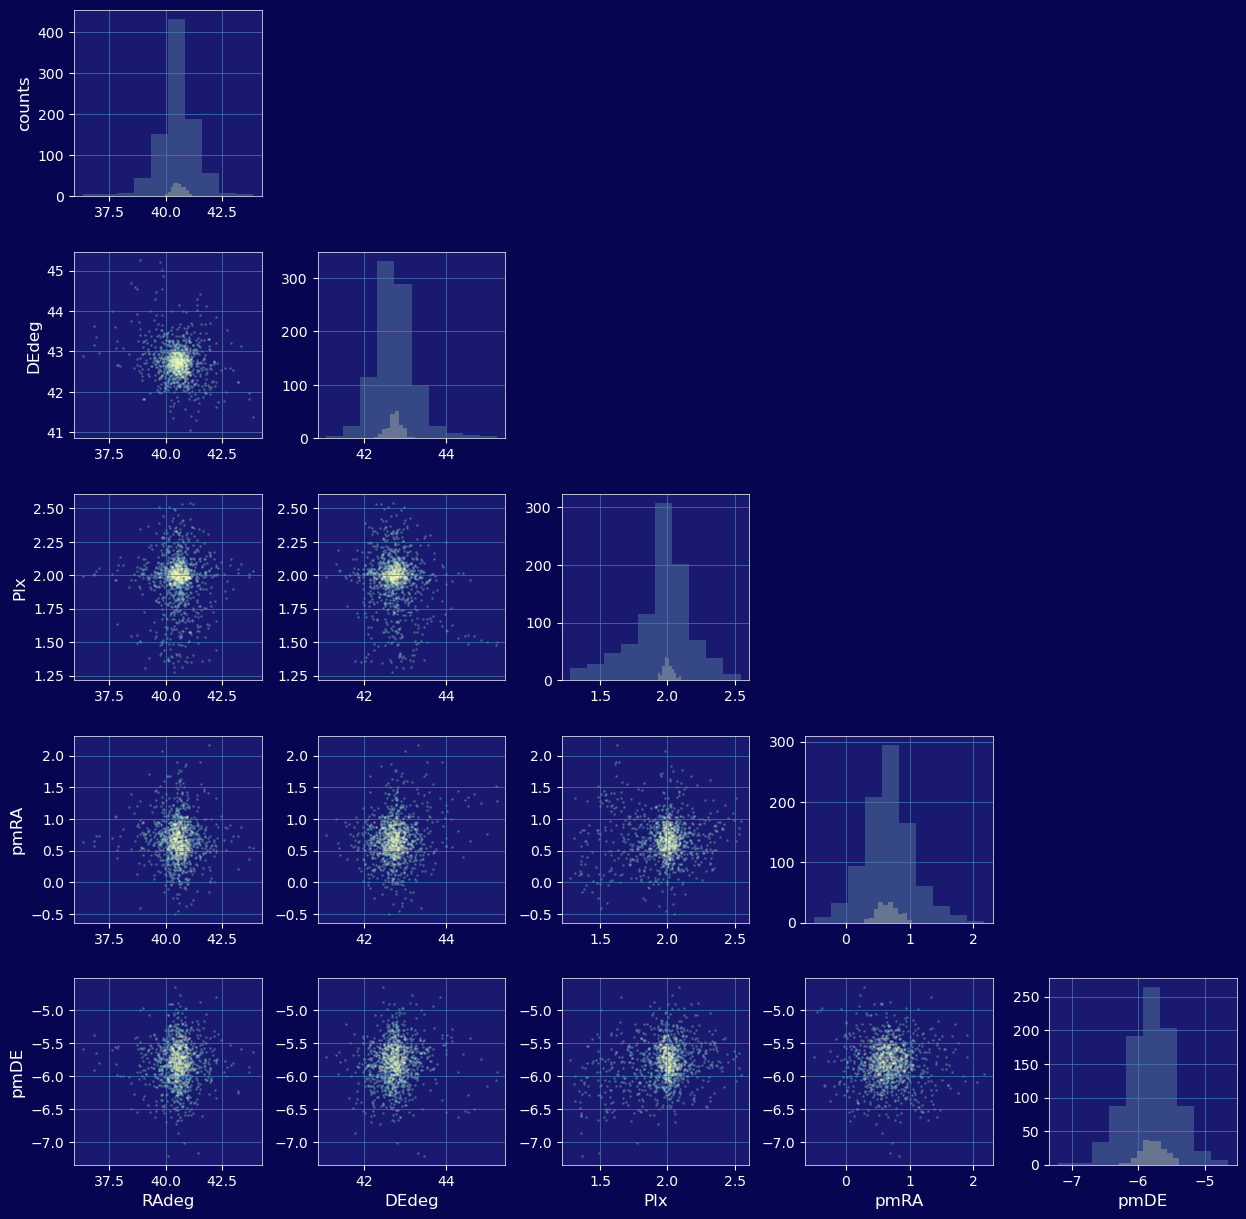

In [206]:
labels = ['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']
# turn to numpy arrays for indexing 
ltp8_cluster_array = LT_NGC_1039_testdf_dropname.to_numpy()
gtp8_cluster_array = GT_NGC_1039_testdf_dropname.to_numpy()
# labels = LTp8_cl4stars.columns
fig, axes = plt.subplots(5,5, figsize = (15,15))
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)


for i in range(ltp8_cluster_array.shape[1]): # y dimension of grid
    for j in range(gtp8_cluster_array.shape[1]): # x dimension of grid 
        if i == j: 
            axes[i,j].hist(ltp8_cluster_array[:,i], bins = 10, alpha = 0.25, label = '< 0.8')
            axes[i,j].hist(gtp8_cluster_array[:,i], bins = 10, alpha = 0.25, label = '> 0.8')
        elif i > j: # lower triangle panels 
            axes[i,j].scatter(ltp8_cluster_array[:,j], ltp8_cluster_array[:,i], alpha = 0.25, s = 1, label = '< 0.8')
            axes[i,j].scatter(gtp8_cluster_array[:,j], gtp8_cluster_array[:,i], alpha = 0.25, s = 1, label = '> 0.8')
        else: 
            axes[i,j].axis('off')
        if j == 0: 
            if i == j: 
                axes[i,j].set_ylabel('counts', fontsize = 12) 
            else: 
                axes[i,j].set_ylabel(labels[i], fontsize = 12)
        
        if i == 4: 
            axes[i,j].set_xlabel(labels[j], fontsize = 12)


In [207]:
# turn to numpy array
LT_test_df_np = LT_NGC_1039_testdf_dropname.to_numpy()
print(LT_test_df_np.shape)
LT_test_df_np

(902, 5)


array([[40.88233171, 42.98547794,  1.987     ,  1.161     , -5.989     ],
       [40.9077821 , 42.91312559,  1.935     , -0.374     , -4.964     ],
       [40.82775818, 42.94866495,  2.079     ,  0.4056    , -5.749     ],
       ...,
       [41.20480298, 42.44962704,  1.751     ,  0.8628    , -6.564     ],
       [41.0187009 , 42.45362208,  1.932     ,  0.9234    , -5.711     ],
       [41.07021361, 42.4052788 ,  2.421     ,  0.9241    , -6.165     ]])

In [208]:
LT_NGC_1039_testdf.shape

(902, 6)

In [209]:
#labels = LTp8_cl4stars.columns
labels = ['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']
labels


['RAdeg', 'DEdeg', 'Plx', 'pmRA', 'pmDE']

In [210]:
# for indexing convenience: 
gtp8 = GTp8_cl4stars.to_numpy()
ltp8 = LTp8_cl4stars.to_numpy()

In [211]:
ltp8.shape

(11880, 6)

In [212]:
ltp8

array([['NGC_1039', 40.88233171, 42.98547794, 1.987, 1.161, -5.989],
       ['NGC_1039', 40.9077821, 42.91312559, 1.935, -0.374, -4.964],
       ['NGC_1039', 40.82775818, 42.94866495, 2.079, 0.4056, -5.749],
       ...,
       ['Trumpler_20', 189.42586529, -60.5660204, 0.2789, -7.006, 0.4154],
       ['Trumpler_20', 189.34074652, -60.58522105, 0.2354, -6.98, 0.2868],
       ['Trumpler_20', 189.26088834, -60.60530524, 0.2759, -7.186, 0.206]],
      dtype=object)

In [213]:
gtp8.shape

(1185, 6)

In [239]:
# writing function to plot for each

def cluster_scatter_matrix(cluster_name, lt_df, gt_df): 

    # select just the info for specific cluster, drop the name column
    ltp8_cluster_spec = lt_df[lt_df['Name'] == cluster_name].drop(columns = 'Name')
    gtp8_cluster_spec = gt_df[gt_df['Name'] == cluster_name].drop(columns = 'Name')
    # turn to numpy arrays for indexing 
    ltp8_cluster_array = ltp8_cluster_spec.to_numpy()
    gtp8_cluster_array = gtp8_cluster_spec.to_numpy()
    # labels = LTp8_cl4stars.columns
    fig, axes = plt.subplots(5,5, figsize = (15,15))
    fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

    for i in range(ltp8_cluster_array.shape[1]): # y dimension of grid
        for j in range(gtp8_cluster_array.shape[1]): # x dimension of grid 
            if i == j: 
                axes[i,j].hist(ltp8_cluster_array[:,i], density = 'True', bins = 10, alpha = 0.5, color = 'yellow', label = '< 0.8')
                axes[i,j].hist(gtp8_cluster_array[:,i], density = 'True', bins = 10, alpha = 0.5, color = 'deeppink', label = '> 0.8')
            elif i > j: # lower triangle panels 
                axes[i,j].scatter(ltp8_cluster_array[:,j], ltp8_cluster_array[:,i], alpha = 0.5, s = 1, color = 'yellow', label = '< 0.8')
                axes[i,j].scatter(gtp8_cluster_array[:,j], gtp8_cluster_array[:,i], alpha = 0.5, s = 1, color = 'deeppink', label = '> 0.8')
            else: 
                axes[i,j].axis('off')
            if j == 0: 
                if i == j: 
                    axes[i,j].set_ylabel('counts', fontsize = 12) 
                else: 
                    axes[i,j].set_ylabel(labels[i], fontsize = 12)
            if i == 4: 
                axes[i,j].set_xlabel(labels[j], fontsize = 12)
        # more for plotting 
        count = cl_4sample[cl_4sample["Name"] == cluster_name]["count"].values[0]
        plt.suptitle(f'Cluster: {cluster_name}, Candidate Count = {count}', fontsize = 25)
        plt.tight_layout()


In [240]:
cl_4sample

,Name,count
4438,NGC_1039,1095
4611,NGC_362,8941
4734,NGC_6402,1337
6054,Trumpler_20,1692


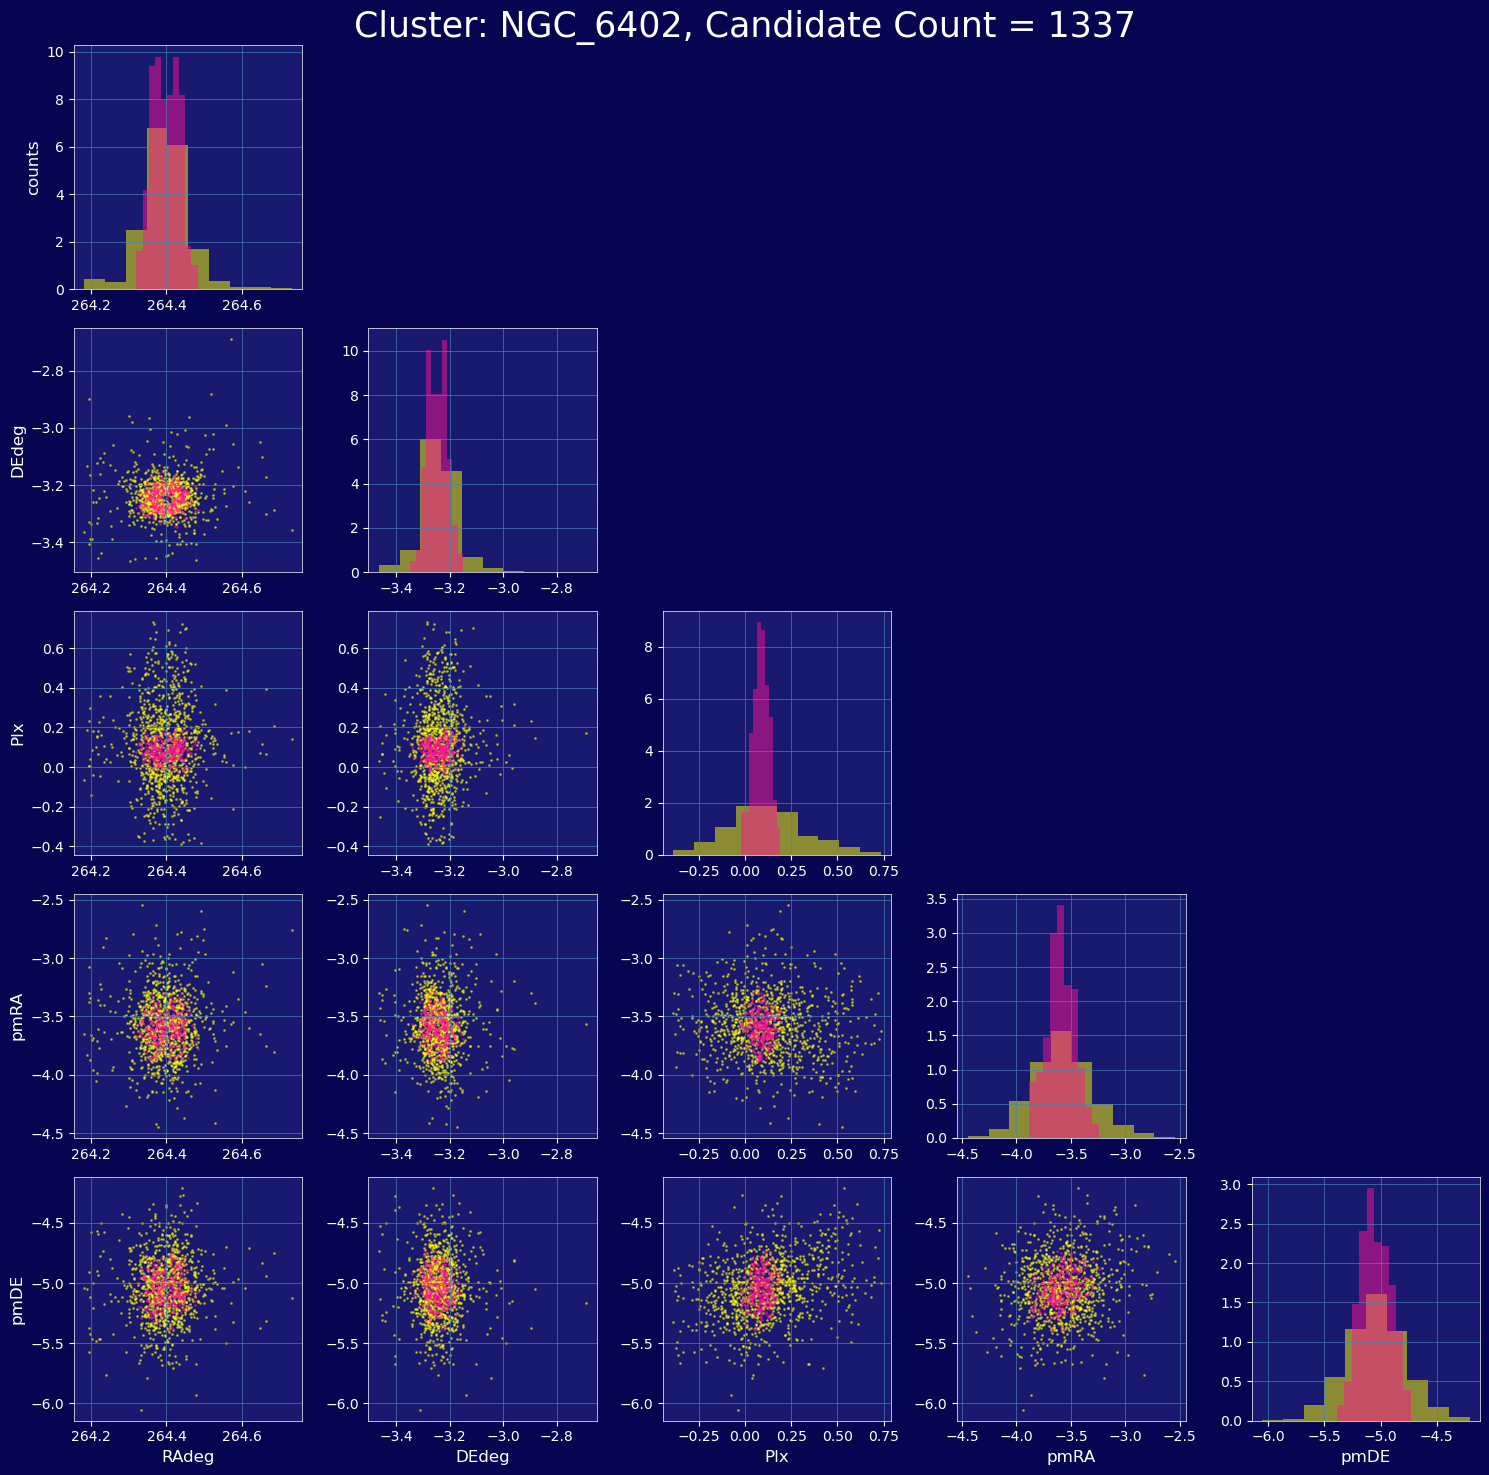

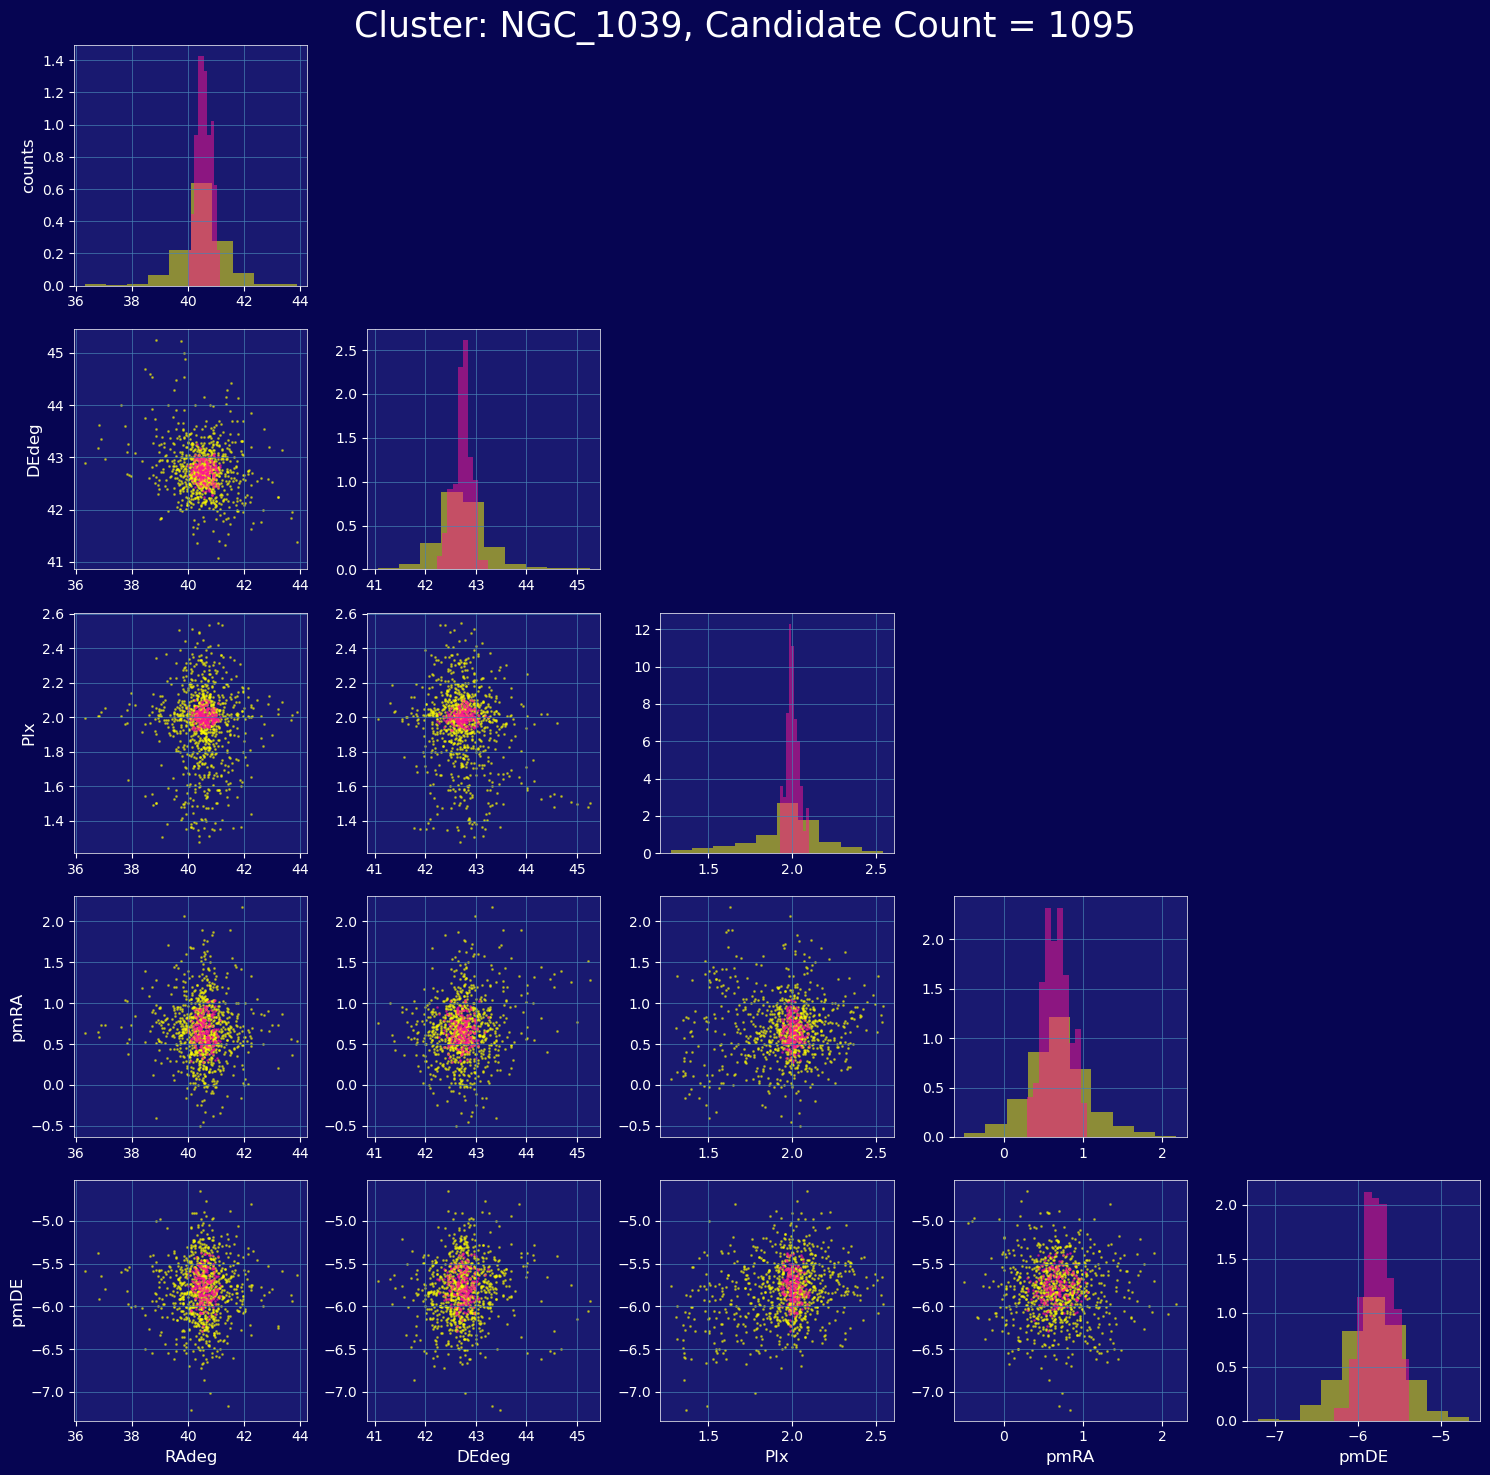

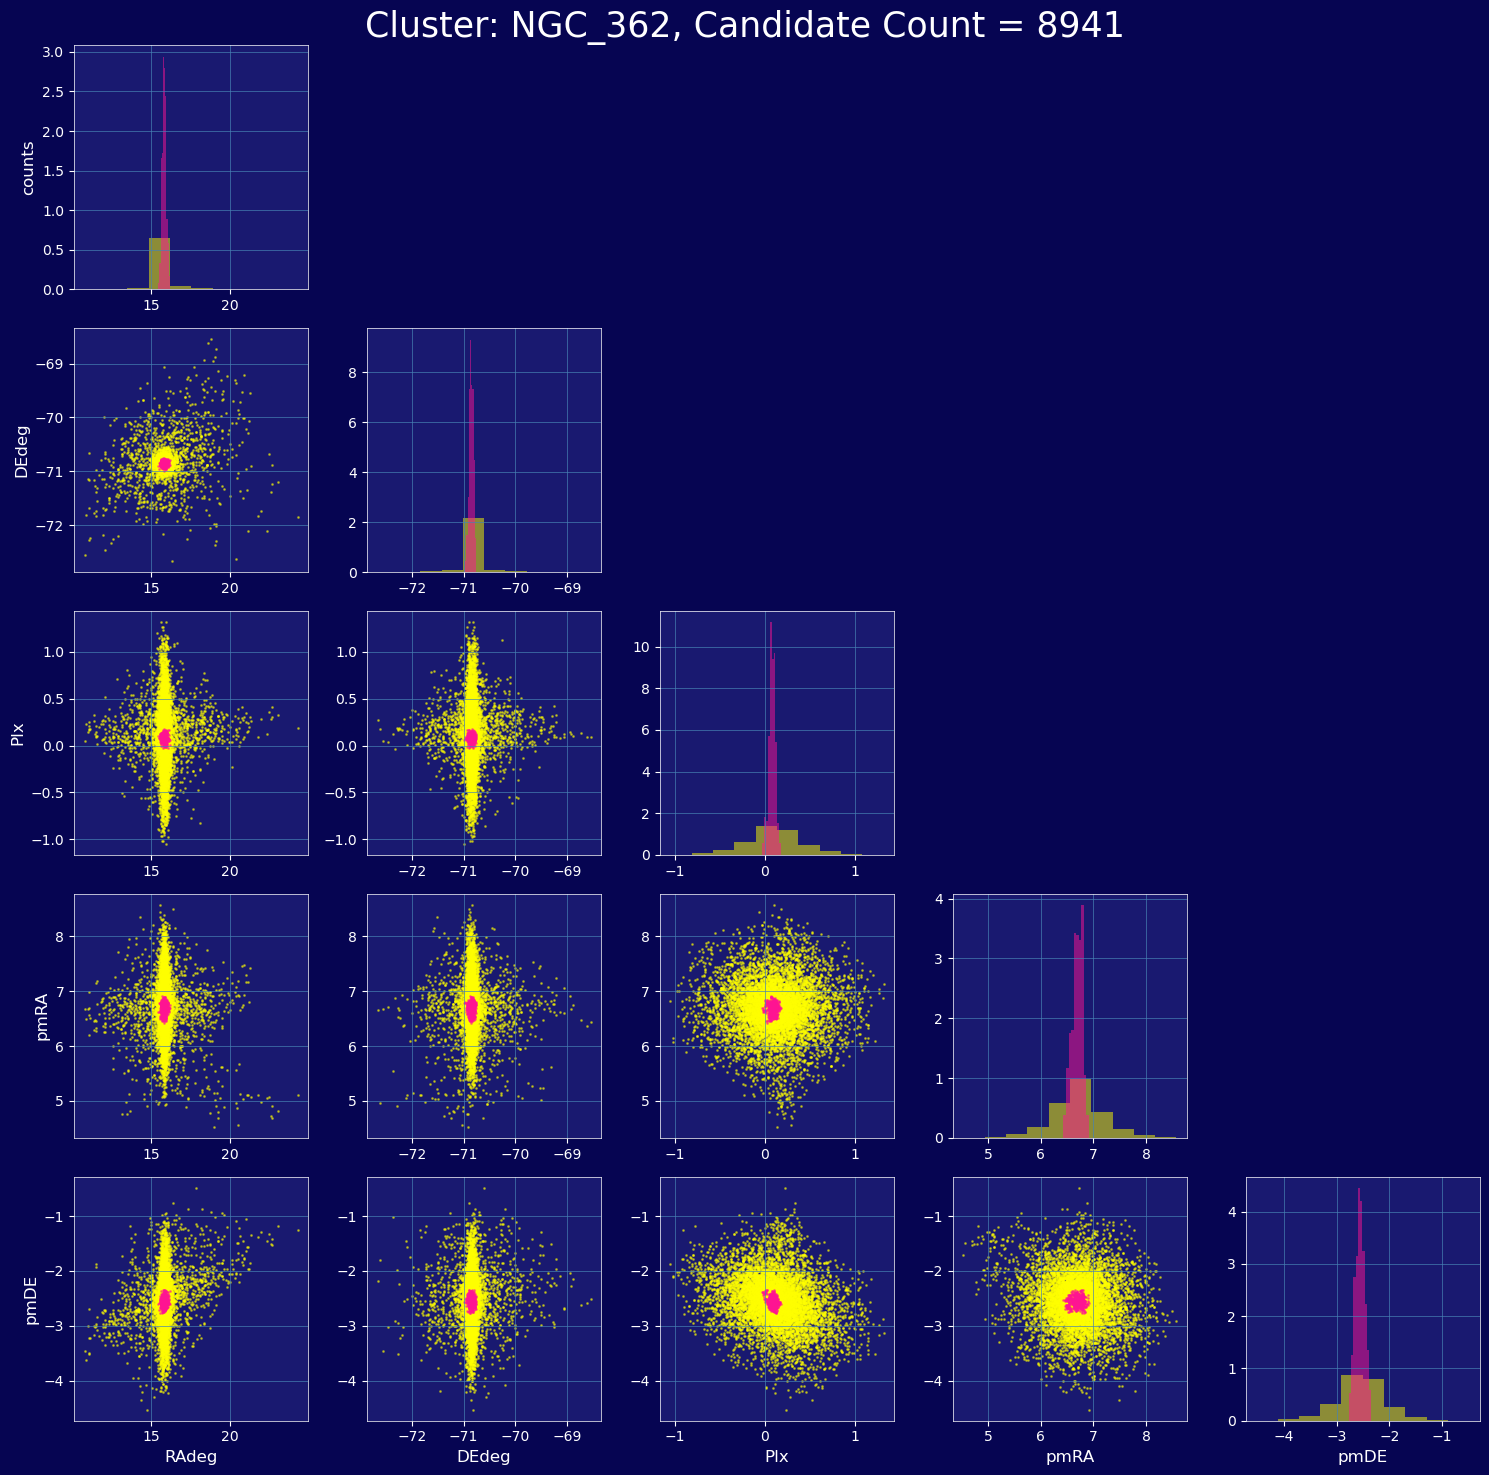

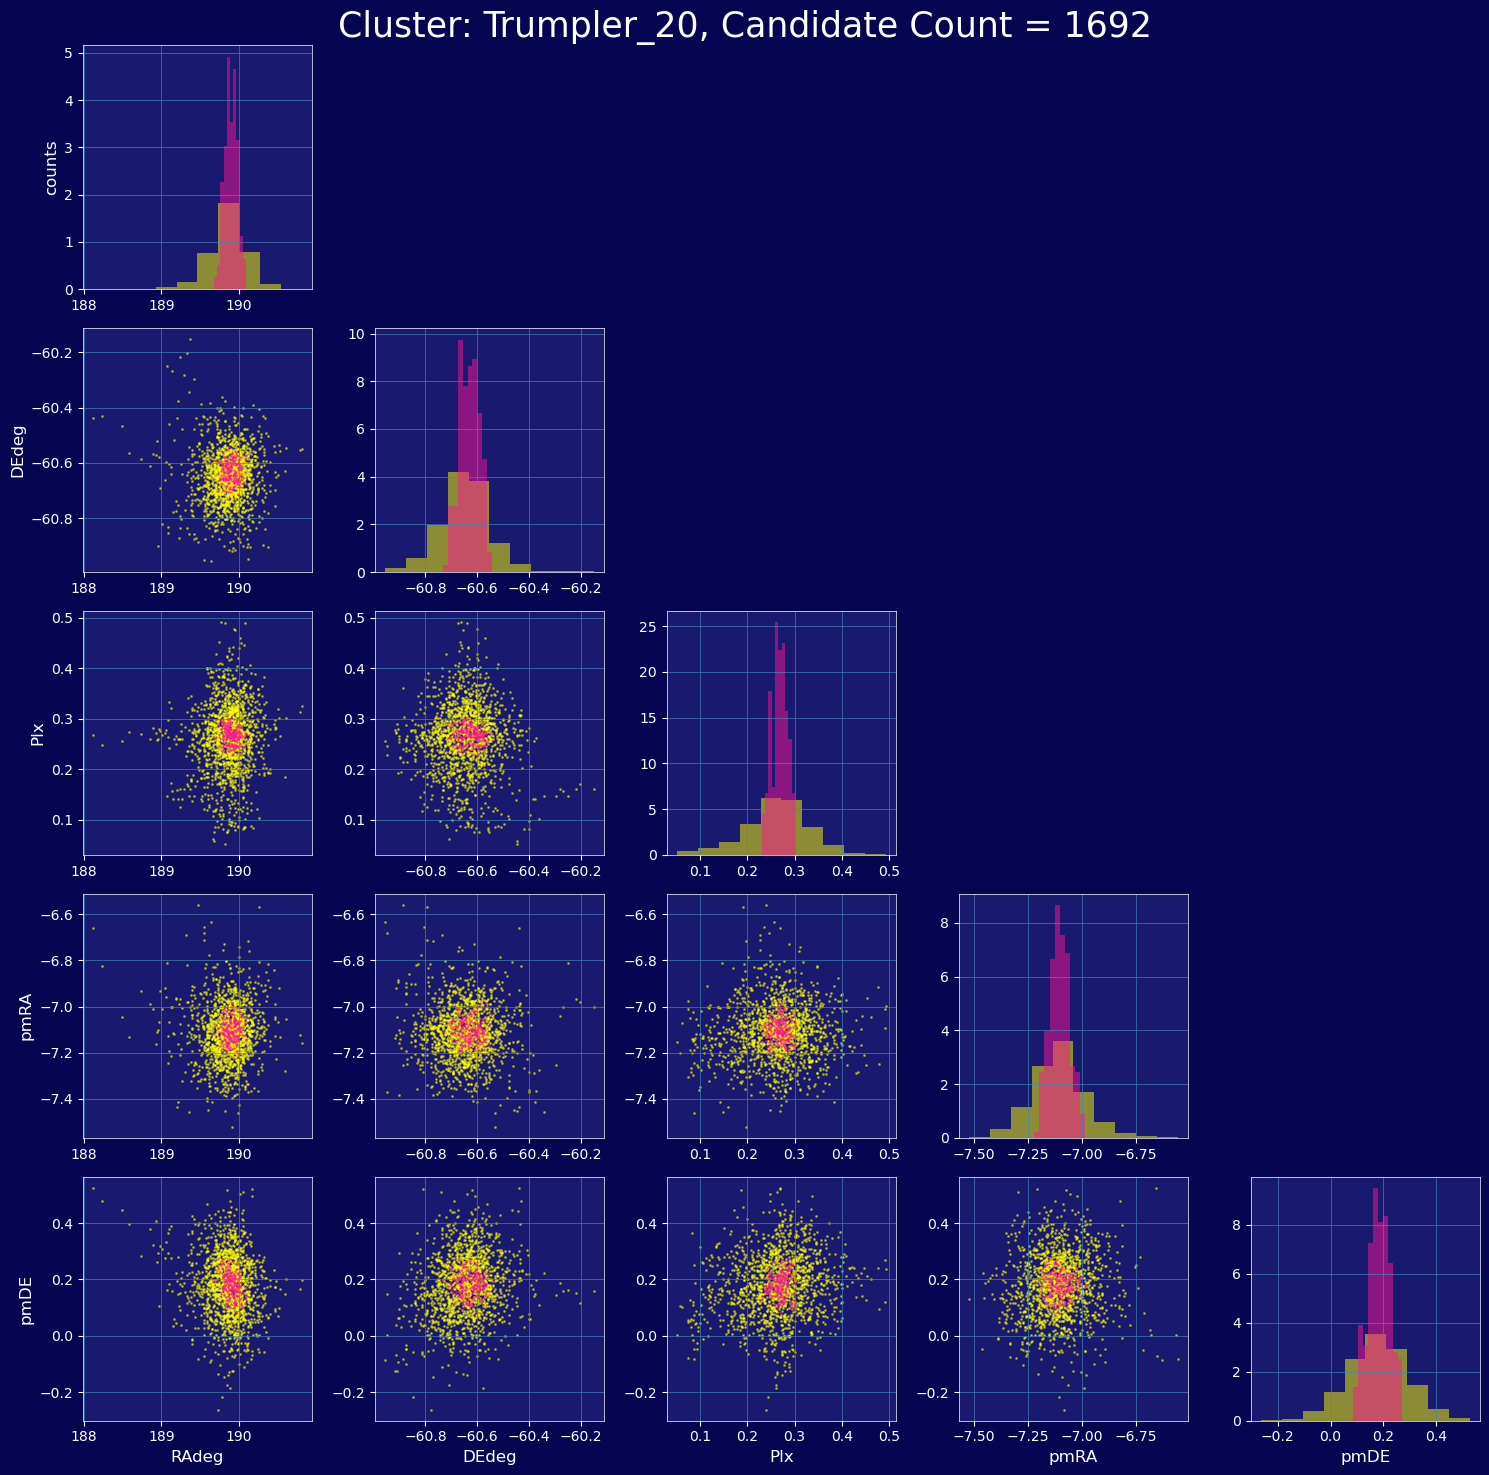

In [241]:
# main df for gt_df = GTp8_cl4stars
# main df for lt_df = LTp8_cl4stars

cluster_names = ['NGC_6402','NGC_1039','NGC_362','Trumpler_20']

for cluster in cluster_names: 
    cluster_scatter_matrix(cluster, LTp8_cl4stars, GTp8_cl4stars)

IndexError: index 5 is out of bounds for axis 1 with size 5

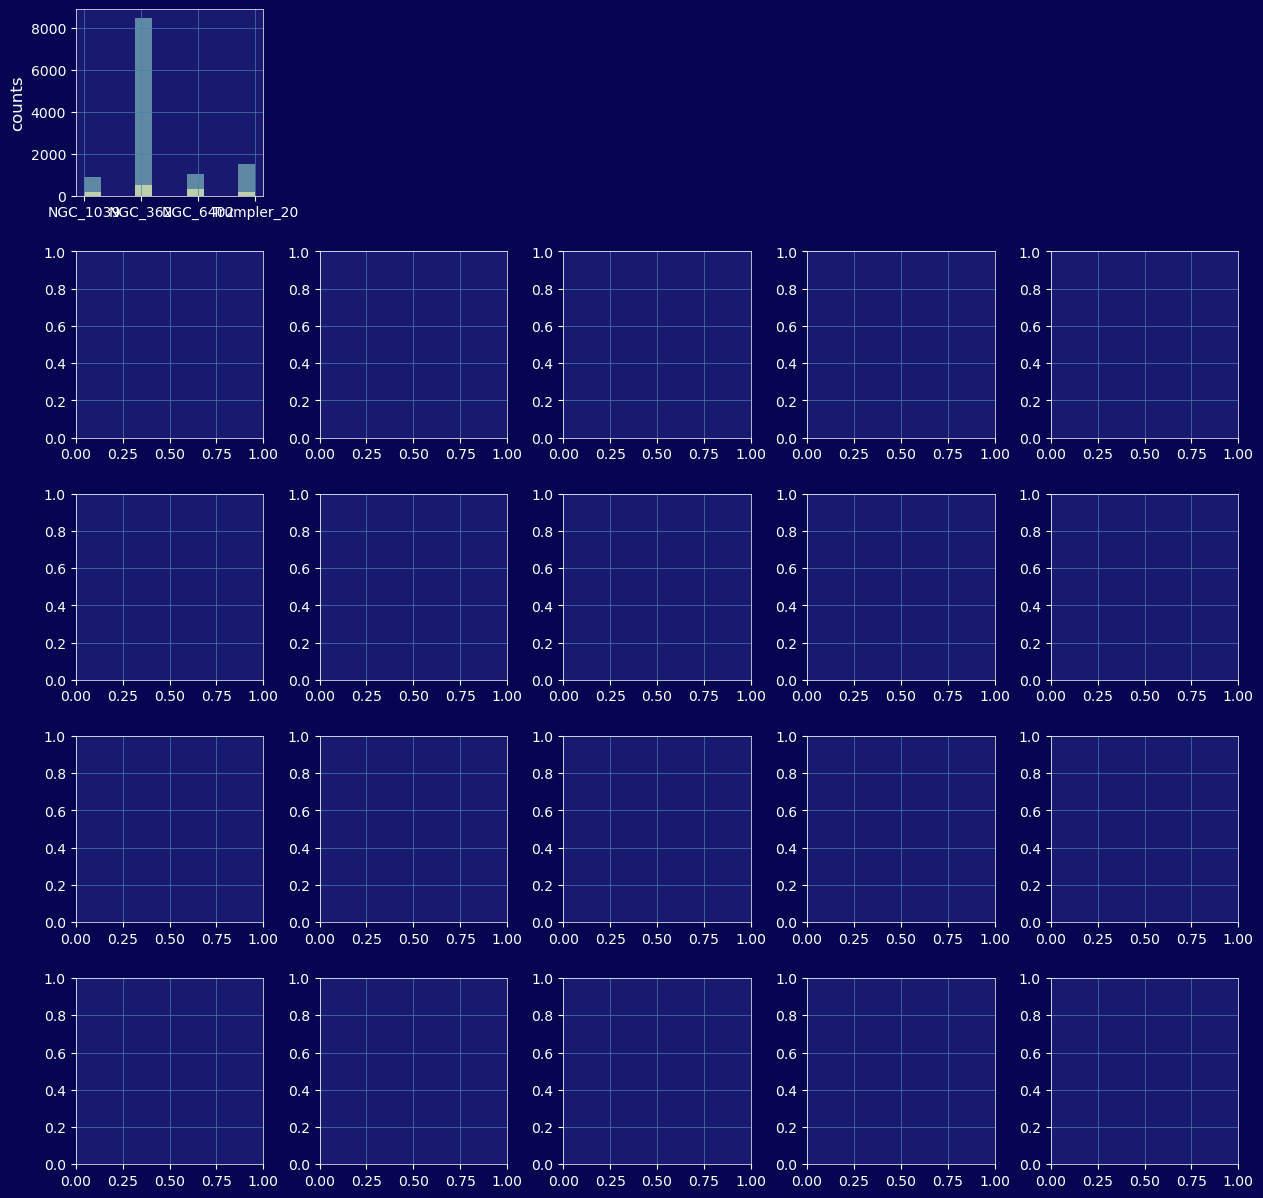

In [235]:
# plotting (based on the extras tutorial)

dims = ltp8.shape[1]
# labels = LTp8_cl4stars.columns
fig, axes = plt.subplots(5,5, figsize = (15,15))
fig.subplots_adjust(wspace = 0.3, hspace = 0.3)

for i in range(ltp8.shape[1]): # y dimension of grid
    for j in range(ltp8.shape[1]): # x dimension of grid 
        if i == j: 
            axes[i,j].hist(ltp8[:,i], bins = 10, alpha = 0.6, label = '< 0.8')
            axes[i,j].hist(gtp8[:,i], bins = 10, alpha = 0.6, label = '> 0.8')
        elif i > j: # lower triangle panels 
            axes[i,j].scatter(ltp8[:,j], ltp8[:,i], alpha = 0.8, s = 1, label = '< 0.8')
            axes[i,j].scatter(gtp8[:,j], gtp8[:,i], alpha = 0.8, s = 1, label = '> 0.8')
        else: 
            axes[i,j].axis('off')
        if j == 0: 
            if i == j: 
                axes[i,j].set_ylabel('counts', fontsize = 12) 
            else: 
                axes[i,j].set_ylabel(labels[i], fontsize = 12)
        
        if i == 4: 
            axes[i,j].set_xlabel(labels[j], fontsize = 12)


# handles, labels_ = axes[dims-1, 0].get_legend_handles_labels()

# fig.legend(
#     handles,
#     labels_,
#     loc="upper right",
#     frameon=False,
#     fontsize=12
# )
# plt.legend(True)


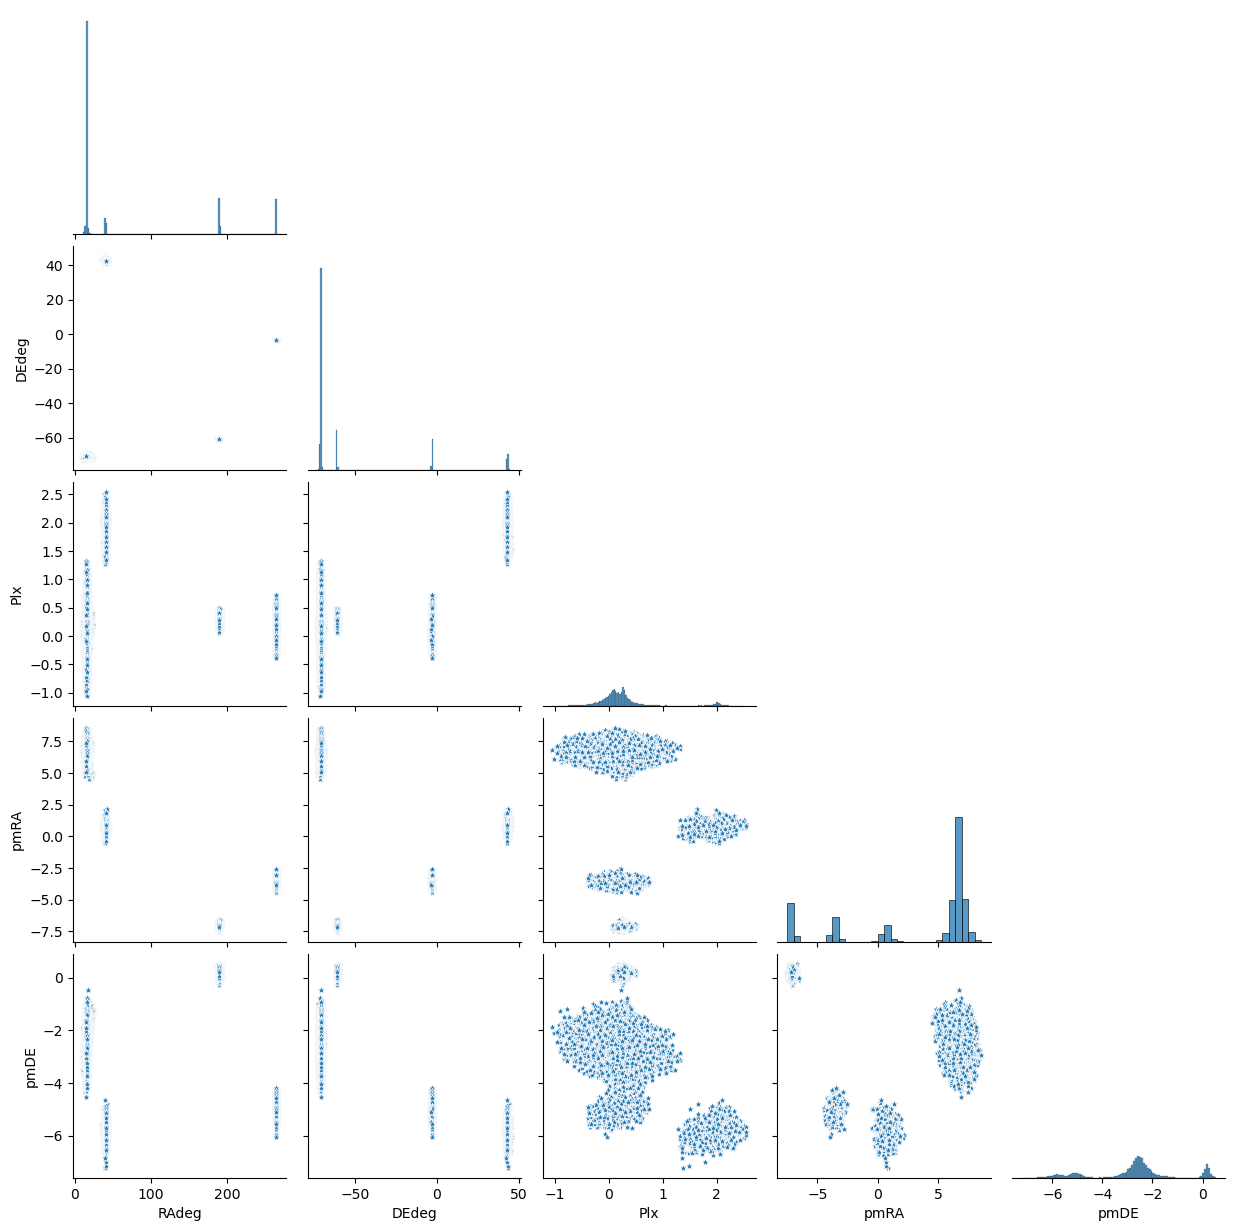

In [92]:
sns.pairplot(x_vars = LTp8_cl4stars.columns, y_vars = GTp8_cl4stars.columns, 
             diag_kind='auto', data = concatenated, corner=True, markers = '*')

In [81]:
sns.pairplot?

Signature:
sns.pairplot(
    data,
    *,
    hue=None,
    hue_order=None,
    palette=None,
    vars=None,
    x_vars=None,
    y_vars=None,
    kind='scatter',
    diag_kind='auto',
    markers=None,
    height=2.5,
    aspect=1,
    corner=False,
    dropna=False,
    plot_kws=None,
    diag_kws=None,
    grid_kws=None,
    size=None,
)
Docstring:
Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric
variable in ``data`` will by shared across the y-axes across a single row and
the x-axes across a single column. The diagonal plots are treated
differently: a univariate distribution plot is drawn to show the marginal
distribution of the data in each column.

It is also possible to show a subset of variables or plot different
variables on the rows and columns.

This is a high-level interface for :class:`PairGrid` that is intended to
make it easy to draw a few common styles. You should use :class:`PairGrid`
directly if you